### Caricamenti delle funzioni

In [2]:
source("../RuntimEnviroment/my_function.R")

Funzioni caricate con successo

### Caricamento dataset

In [3]:
df <- load_csv_file("../Dataset/Sentiment_en_tweet_2023.csv")

Il file è stato trovato: ../Dataset/Sentiment_en_tweet_2023.csv 
Contenuto del file CSV:
        userid        username
1 2.224061e+07   AlArabiya_Eng
2 1.252283e+08     apple2hotel
3 1.365269e+18 TerryTheTipste1
4 1.295405e+18 MayadeenEnglish
5 1.508116e+18   FloranceOlman
6 1.616511e+18  NUHerbalHealth
                                                                                                                                                   acctdesc
1                                                                                             The Arab worldâ\200\231s leading source of global news and opinion.
2                                    Travel bookings can be made online through a travel  website through a traditional travel agent.\n#travel #travelbuddy
3            Sports Nut, Tipping Enthusiast. 80s music addict who loves betting on horses and all sport. Follow for FREE Betting Tips on variety of Sports.
4                                                               

# 1 Analisi di 'score'

In [10]:
# Filtro il dataset per sentiment = "neu" e calcola gli indici di sintesi per la feature "score"
df_neu <- df[df$sentiment == "neu", ]
# Filtro il dataset per sentiment = "neg" e calcola gli indici di sintesi per la feature "score"
df_neg <- df[df$sentiment == "neg", ]
# Filtro il dataset per sentiment = "pos" e calcola gli indici di sintesi per la feature "score"
df_pos <- df[df$sentiment == "pos", ]

In [56]:
cat("\nIndici di sintesi per il sentiment 'neu':\n")
sintesi_feature(df_neu, "score")

cat("\nIndici di sintesi per il sentiment 'neg':\n")
sintesi_feature(df_neg, "score")

cat("\nIndici di sintesi per il sentiment 'pos':\n")
sintesi_feature(df_pos, "score")


Indici di sintesi per il sentiment 'neu':

Indici di sintesi per la colonna: score 
-----------------------------------
Minimo : 0.3334608 
Massimo : 0.9359589 
Media : 0.5901491 
Mediana : 0.5753816 
Varianza : 0.01718516 
Deviazione_Standard : 0.1310922 
Range : 0.602498 
Quartile_1 : 0.4872291 
Quartile_3 : 0.6871927 

Indici di sintesi per il sentiment 'neg':

Indici di sintesi per la colonna: score 
-----------------------------------
Minimo : 0.3369945 
Massimo : 0.966978 
Media : 0.7561572 
Mediana : 0.8125669 
Varianza : 0.02557712 
Deviazione_Standard : 0.1599285 
Range : 0.6299835 
Quartile_1 : 0.6441814 
Quartile_3 : 0.8871366 

Indici di sintesi per il sentiment 'pos':

Indici di sintesi per la colonna: score 
-----------------------------------
Minimo : 0.3343884 
Massimo : 0.9488874 
Media : 0.5957266 
Mediana : 0.5780436 
Varianza : 0.02124255 
Deviazione_Standard : 0.1457482 
Range : 0.614499 
Quartile_1 : 0.4728078 
Quartile_3 : 0.7197133 


Grafico della distribuzione generato per: score 


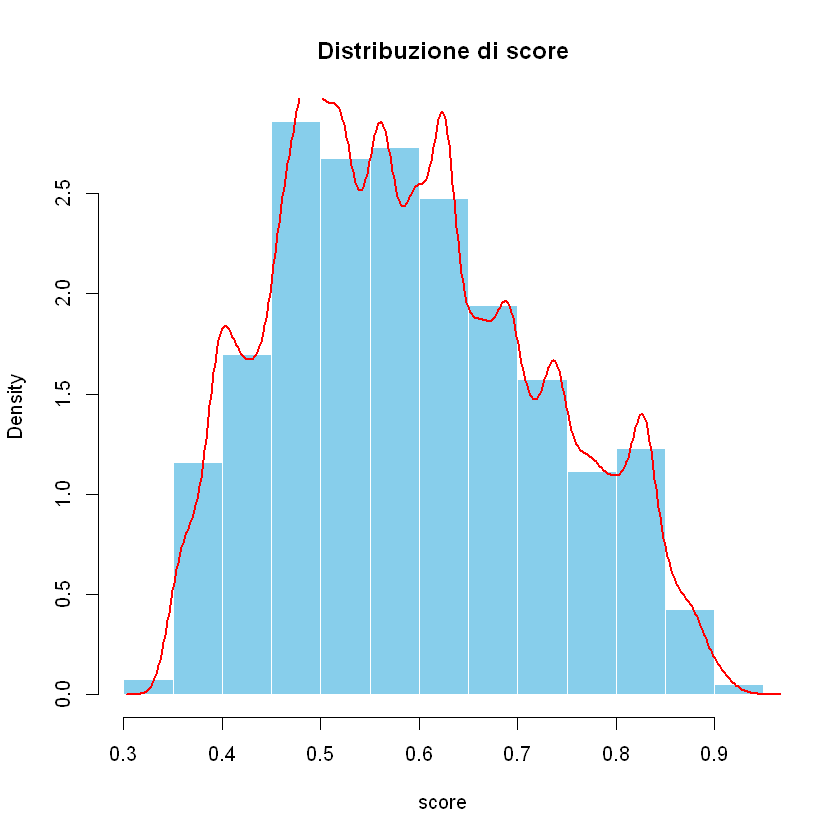

Grafico della distribuzione generato per: score 


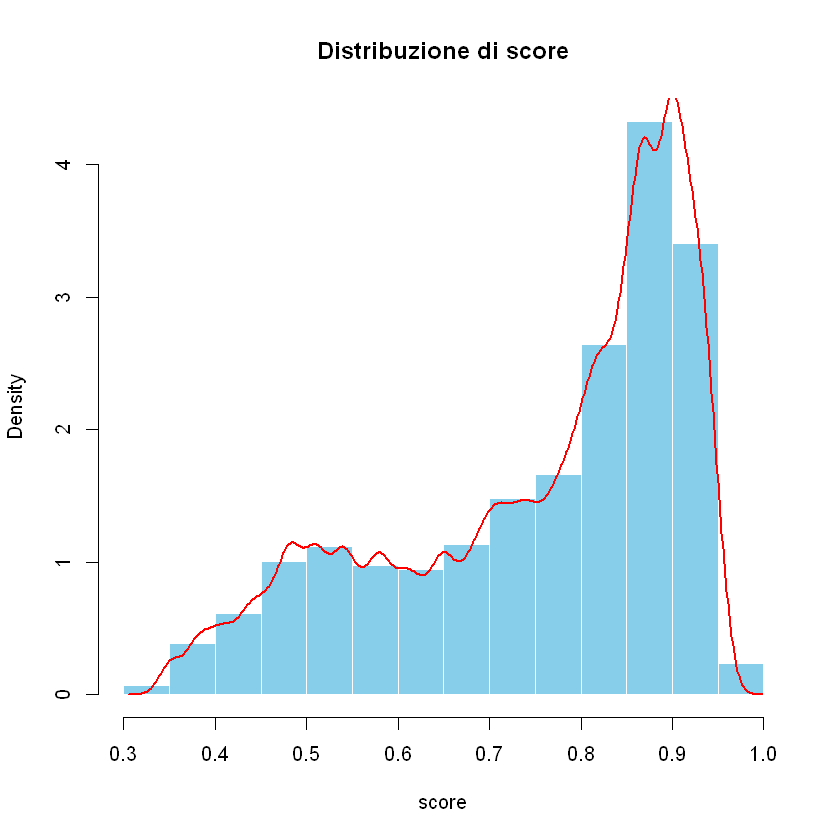

Grafico della distribuzione generato per: score 


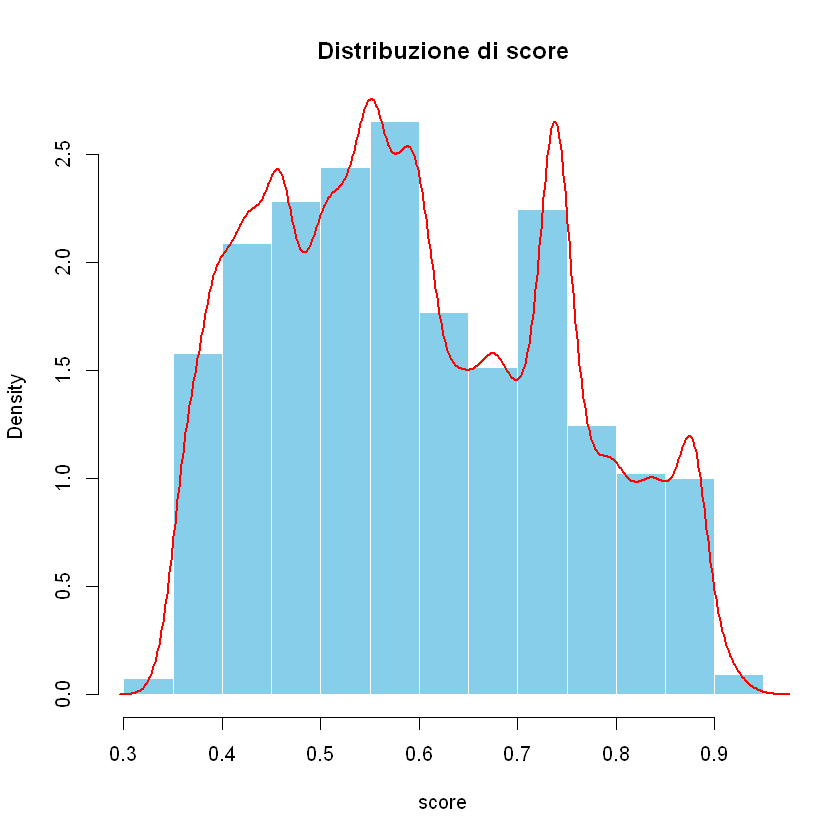

In [57]:
disegna_hist(df_neu, "score")
disegna_hist(df_neg, "score")
disegna_hist(df_pos, "score")

Grafico Boxplot generato per: score 


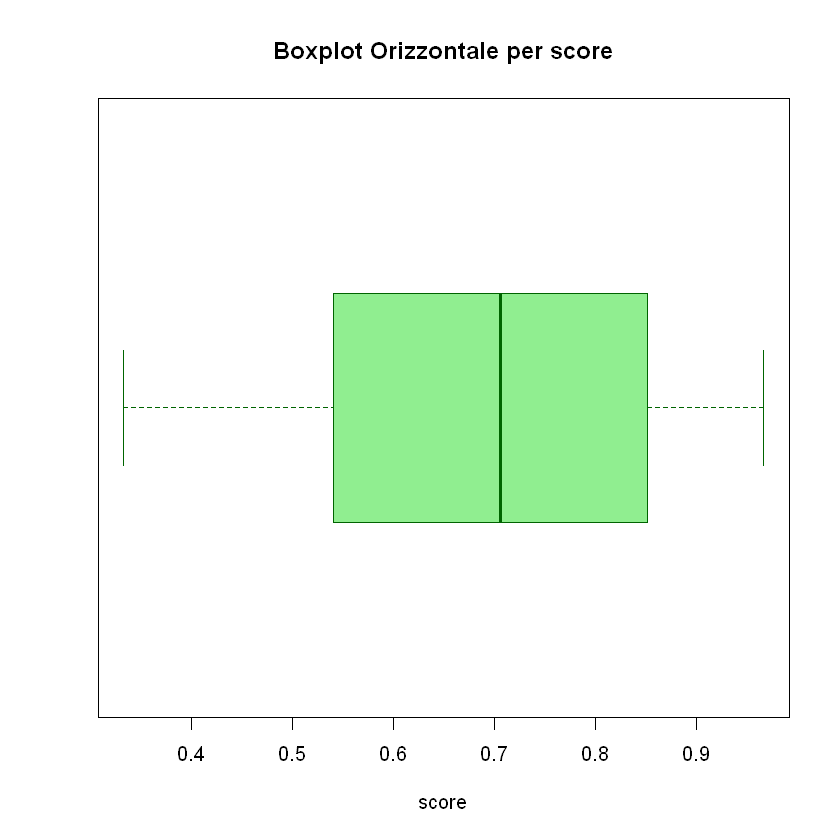

In [38]:
disegna_boxplot(df, "score")

# 2 Relazione tra 'score' e 'sentiment'

In [39]:
# Contare il numero di occorrenze per ciascun valore di sentiment
frequenze_sentiment <- table(df$sentiment)

# Stampo il risultato
print(frequenze_sentiment)


   neg    neu    pos 
467532 208415 100642 


Boxplot generato per la relazione tra score e sentiment 


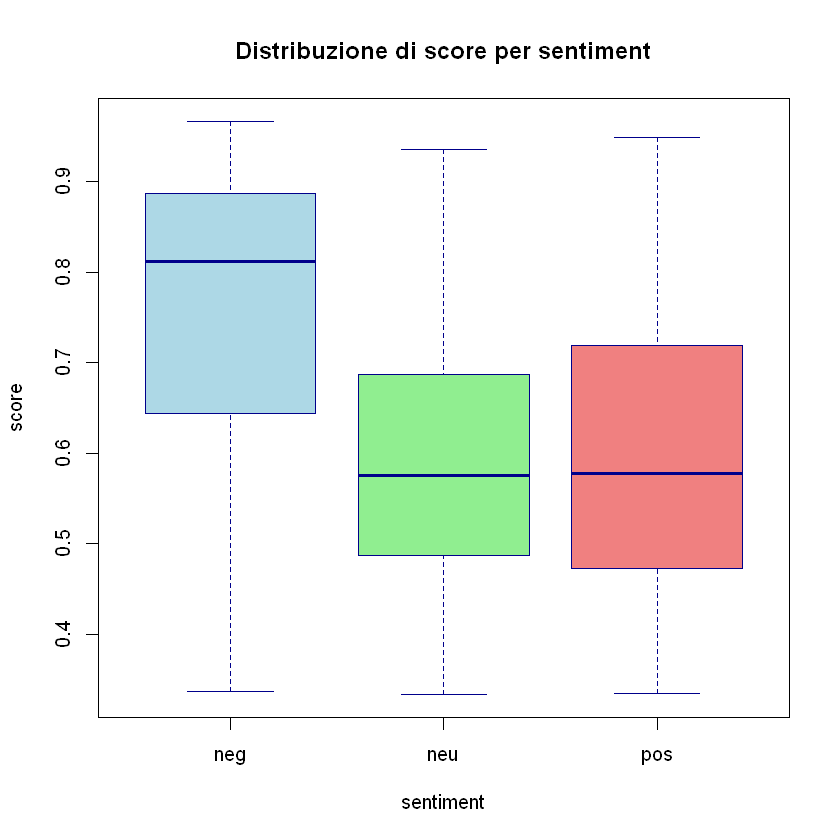

In [40]:
disegna_boxplot_relazione(df, "score","sentiment")

### 2.1 Correlazione con cor()

In [44]:
# Trasformare il sentiment in variabili numeriche
df$sentiment_numeric <- factor(df$sentiment, levels = c("pos", "neu", "neg"), labels = c(1, 2, 3))

# Calcolare la correlazione tra score e sentiment numerico
correlazione <- cor(df$score, as.numeric(df$sentiment_numeric))

# Stampo della correlazione
cat("Correlazione tra score e sentiment:", correlazione, "\n")

Correlazione tra score e sentiment: 0.4238134 


### 2.2 Correlazione con Cramer’s V

In [50]:
# Carico il pacchetto necessario per Cramér's V
install.packages("vcd")  # Se non lo hai già installato
library(vcd)

si installa anche la dipendenza 'lmtest'





  C'è una versione binaria disponibile, ma la versione con le sorgenti
  è successiva:
    binary source needs_compilation
vcd 1.4-11 1.4-13             FALSE

package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\smike18\AppData\Local\Temp\Rtmpcpk56f\downloaded_packages


installazione pacchetto sorgenti 'vcd'


Caricamento del pacchetto richiesto: grid



In [51]:
# Trasformazione della variabile qualitativa in un fattore
df$sentiment <- factor(df$sentiment, levels = c("pos", "neu", "neg"))

# 1. Calcolare ANOVA per testare la differenza tra le medie
anova_result <- aov(score ~ sentiment, data = df)

# 2. Visualizzare il risultato ANOVA
cat("Risultati ANOVA:\n")
summary(anova_result)

# 3. Calcolare Cramér's V per la correlazione tra score (quantitativa) e sentiment (qualitativa)
# Creo una tabella di contingenza tra le variabili
table_sentiment_score <- table(df$sentiment, df$score)

# Calcolare il coefficiente di Cramér's V
cramers_v <- assocstats(table_sentiment_score)$cramer

cat("Cramér's V:", cramers_v, "\n")

# Interpretazione: Cramér's V va da 0 (nessuna associazione) a 1 (associazione forte)
if (cramers_v < 0.1) {
  cat("Associazione debole tra le variabili.\n")
} else if (cramers_v >= 0.1 & cramers_v < 0.3) {
  cat("Associazione moderata tra le variabili.\n")
} else {
  cat("Associazione forte tra le variabili.\n")
}

Risultati ANOVA:


                Df Sum Sq Mean Sq F value Pr(>F)    
sentiment        2   5018    2509  110225 <2e-16 ***
Residuals   776586  17678       0                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Cramér's V: 0.9977126 
Associazione forte tra le variabili.


# 3 Soglia utilizzando i percentili

In [3]:
# Creo una copia del dataframe
df_att <- df

# Converto il sentiment in numerico se non lo è già
df_att$sentiment_numeric <- factor(df_att$sentiment, levels = c("pos", "neu", "neg"), labels = c(1, 2, 3))

# Calcolare il 75° percentile per ogni categoria di sentiment
percentili <- tapply(df_att$score, df_att$sentiment, function(x) quantile(x, 0.75))

# Visualizzo i percentili per ogni sentiment
cat("Percentili 75° per ogni sentiment:\n")
print(percentili)

# Classificare i valori come attendibili o non attendibili in base al quantile di ciascuna categoria di sentiment
df_att$sentiment_attendibile <- mapply(function(score, sentiment) {
  quantile_val <- percentili[sentiment]  # Recupero il 75° percentile per il sentiment specifico
  if (score >= quantile_val) {
    return("Attendibile")
  } else {
    return("Non Attendibile")
  }
}, df_att$score, df_att$sentiment)

# Visualizzare i risultati
cat("\nClassificazione dei sentimenti:\n")
table(df_att$sentiment_attendibile)


Percentili 75° per ogni sentiment:
      neg       neu       pos 
0.8871366 0.6871927 0.7197133 

Classificazione dei sentimenti:



    Attendibile Non Attendibile 
         194187          582402 

# 4 Serie temporale dei sentimenti

In [18]:
# Funzione per disegnare il grafico dei sentiment
disegna_sentiment <- function(dff) {
    
    dff$tweetcreatedts <- as.POSIXct(dff$tweetcreatedts, format="%Y-%m-%d %H:%M:%S")
    
    # Carico la libreria 'lubridate' per gestire facilmente la data
    library(lubridate)
    
    # Raggruppo i dati per sentiment e ora
    grouped <- dff %>%
        mutate(hour = floor_date(tweetcreatedts, "hour")) %>%  # Raggruppa per ora
        group_by(hour, sentiment) %>%
        summarise(count = n(), .groups = "drop")  # Conto i tweet per ora e sentiment
    
    # Creo il grafico
    ggplot(grouped, aes(x = hour, y = count, color = sentiment, group = sentiment)) +
        geom_line(linewidth = 1) +  # Linea che connette i punti
        geom_point(size = 2) +      # Punti per ogni dato
        labs(
            title = "Andamento temporale dei sentimenti nei tweet",
            x = "Ora",
            y = "Numero di tweet",
            color = "Sentiment"
        ) +
        theme_minimal(base_size = 14) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

## 4.1 Considerando tutti i sentiment

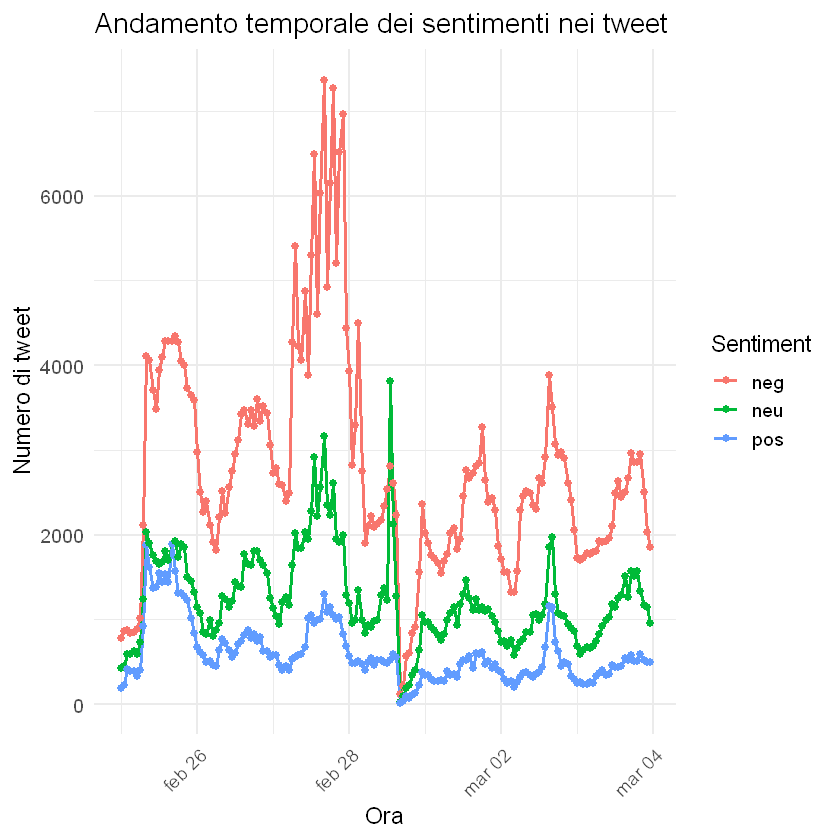

In [19]:
# Carico i pacchetti necessari
library(ggplot2)
library(dplyr)
library(lubridate)

disegna_sentiment(df);

## 4.2 Considerando solo i sentiment attendibili

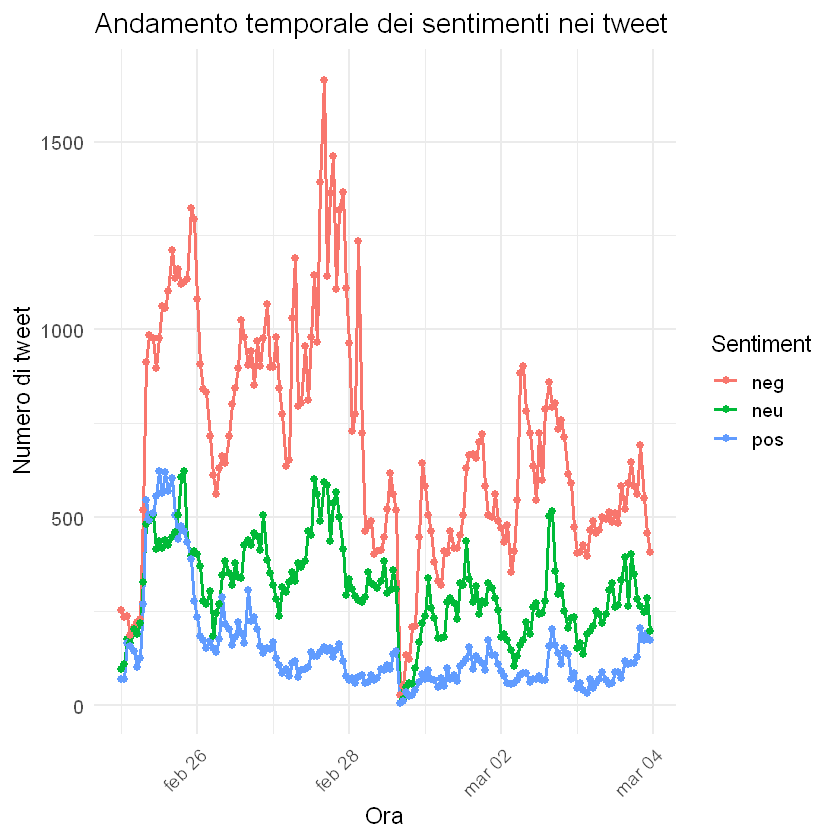

In [20]:
# Carico i pacchetti necessari
library(ggplot2)
library(dplyr)
library(lubridate)

#Ottengo solo le istanze attendibili di sentiment
df_att_copy <- df_att[df_att$sentiment_attendibile == "Attendibile", ]

# str(df_att_copy)

disegna_sentiment(df_att_copy);

# 5 Considerazioni finali 

## 5.1 analisi di tweet tra 28 e 29 Febbraio 

In [24]:
library(dplyr)

df_att$tweetcreatedts <- as.POSIXct(df_att$tweetcreatedts, format="%Y-%m-%d %H:%M:%S")

# Filtro per sentiment positivo e per date tra il 28 e il 29 febbraio
df_window <- df_att %>%
    filter(
        sentiment_attendibile == "Non Attendibile",      # Condizione: Non Attendibile
        sentiment == "pos",                             # Condizione: Sentiment positivo
        tweetcreatedts >= as.POSIXct("2023-02-28 00:00:00") &  # Inizio intervallo
        tweetcreatedts <= as.POSIXct("2023-02-28 23:59:59")    # Fine intervallo
    ) %>%
    sample_n(10)  # Estraggo 10 tweet casuali tra quelli filtrati

# Mostra i risultati
df_window$text


userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts,sentiment,score,sentiment_numeric,sentiment_attendibile
<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dttm>,...,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>
2.971004e+07,AdamTM24,"No bull. No filter. Love genre film/TV, video games, auto racing, travel, and good friends. He/Him. 30 something but 28 forever. Girl crazy.",Cincinnati-Dayton Metroplex,4552,846,82834,2009-04-08 13:07:10,1.630511e+18,2023-02-28 10:13:10,...,,False,0,0,,2023-02-28 12:46:31.079526,pos,0.5564643,1,Non Attendibile
1.343193e+18,GDolfan,ð“œð“²ð“ªð“¶ð“² ð““ð“¸ð“µð“¹ð“±ð“²ð“·ð“¼ ð““ð“²ð“® ð“—ð“ªð“»ð“­ #TheSamoanSniper,"Baden-WÃ¼rttemberg, Deutschland",479,327,1485,2020-12-27 13:51:17,1.630550e+18,2023-02-28 12:45:18,...,,False,0,0,,2023-02-28 13:48:06.728529,pos,0.4970563,1,Non Attendibile
1.934644e+07,LouiseMensch,"""Unhinged British witch"" ""a textbook succubus""- Russian Insider UKRAINE LIST of great accounts to follow and RT - https://t.co/LsIOlRdm9e",In Team Treasonâ€™s Head,36606,269208,110108,2009-01-22 16:36:16,1.630586e+18,2023-02-28 15:11:07,...,,False,0,0,,2023-02-28 15:29:02.177035,pos,0.5193077,1,Non Attendibile
1.289392e+18,Manan48176326,,,77,65,21836,2020-08-01 02:46:05,1.630359e+18,2023-02-28 00:08:52,...,,False,0,0,,2023-02-28 00:46:07.374431,pos,0.4575909,1,Non Attendibile
3.397869e+09,lisa_haycocks,,UK,399,98,3889,2015-07-31 22:16:34,1.630389e+18,2023-02-28 02:06:36,...,,False,0,0,,2023-02-28 06:45:55.236868,pos,0.5717947,1,Non Attendibile
4.160203e+09,LPincia,"il Genoa non Ã¨ solo una squadra. Per noi di Genova (quelli veri) Ã¨ una Fede. Destra,anticomunista. ðŸ‡ºðŸ‡¦ðŸŒ»ðŸŒ»ðŸŒ» No DM, non rispondo.",Genoa,4618,4273,448532,2015-11-11 00:43:10,1.630511e+18,2023-02-28 10:09:31,...,,False,0,0,,2023-02-28 11:36:46.513115,pos,0.3678044,1,Non Attendibile
1.089245e+18,alanastarisborn,A 'CRAP ANIME PRODUCTION' IN ASSOCIATION WITH 'I CAN'T BELIEVE I'M WATCHING THIS' & 'MADE ON MY PHONE MOVIES' currently #selfisolating #Viralvideos #movies,Not Of This World,217,291,100302,2019-01-26 19:34:26,1.630413e+18,2023-02-28 03:41:48,...,,False,0,0,,2023-02-28 04:45:20.130292,pos,0.4831085,1,Non Attendibile
2.902523e+09,victorivasik,,,22,22,18104,2014-11-17 09:12:21,1.630468e+18,2023-02-28 07:21:41,...,,False,0,0,,2023-02-28 09:46:10.313709,pos,0.5399685,1,Non Attendibile
1.491023e+18,lorchan50,ðŸ‡¨ðŸ‡¦ â¤ ðŸ‡ºðŸ‡¦ A Canadian with a heart for Ukraine! This is the way! NAFOforLife! Supporting https://t.co/LLD9Db7qXO https://t.co/NwMetzZzKl and @georgian_legion,Langley. Virginia,4952,3509,4936,2022-02-08 12:15:41,1.630465e+18,2023-02-28 07:07:20,...,,False,0,0,,2023-02-28 09:46:11.506368,pos,0.5564643,1,Non Attendibile


In [25]:
df_window$text

[1] "ðŸ‡ºðŸ‡¦ This is the first time I've seen something like this and I'm a bit impressed.\n\n#UkraineWar #Ukrainian #Ukraineï¸\217 #RussiaisATerroistState #RussiaIsCollapsing #RussiaInvadedUkraine https://t.co/t940nNjIx3"                                                                                                    
 [2] "Finally arrived in #Germany #FinsUp #miamidolphins #nfltwitter #perfectseason #Undefeated @MiamiDolphins #RTLNFL https://t.co/LdCMumpitP"                                                                                                                                                                                  
 [3] "Simply trying to give the world an example of what one human being can do for people he loves.ðŸ’›ðŸ’\231ðŸ¥¶#40hourruckmarch #Ukraine https://t.co/ld0i4519Sh"                                                                                                                                                               
 [4] "Exactly one year ago the most epic battle in the war in Ukraine took place. Russian VDV in Hostomel were preparing to â\200œvictoriouslyâ\200\235 march into Kyiv. But in Bucha AFU was waiting for them and delivered absolute carnage. \nThis was the moment I knew that Ukraine will win.\n#Ukraine https://t.co/lr4tyfPaQU"     
 [5] "In the still of the night, Larry paid his respects..\n\nAfter the busyness of the day, it was just myself and Larry on the street last night.\nI caught this as he waited for me to knock, &amp; the wreath made this the perfect shot.\n#PhotoDuJour\n#IStandWithUkraine\n#LarryStandsWithUkraine https://t.co/ogBiNEtULX"
 [6] "Watch the heartfelt story of Alyona from IrpinðŸ’” \nIn June 2022, her family returned to help neighbors sort through the rubble of their destroyed homes, restore communications, and help raise funds for reconstruction.\n#united24 https://t.co/zUZVNnJAxy"                                                            
 [7] "Get my art printed on awesome products at Redbubble #RBandME https://t.co/0OwQtvSOVZâ\200¦ #findyourthing #redbubble #artwork #ArtistOnTwitter #artist #killthebill #Masks #fashion #style #protest #LogoDesign #colourful #Sarcasm #gift #Christmas #birthday #MothersDay #FathersDay #USA"                                  
 [8] "We bow our heads before the Heroes who protect Ukrainians from the barbarity of the Russian forces, defending freedom and democracy. \nThey will not be forgotten. \n\nRIP â\200“ Dmytro Nesteruk, Oleksandr Korpan, Oleksandr Kapitonenko, Illia Shaharov\n\n#ArmUkraineNow https://t.co/2QxOrm3GmI"                         
 [9] "ðŸ‡ºðŸ‡¦ This is the first time I've seen something like this and I'm a bit impressed.\n\n#UkraineWar #Ukrainian #Ukraineï¸\217 #RussiaisATerroistState #RussiaIsCollapsing #RussiaInvadedUkraine https://t.co/t940nNjIx3"                                                                                                    
[10] "If you canâ\200\231t believe Tucker Carlson, try highly regarded academic Noam Chomskyâ\200\231s account on how the #UkraineRussianWarï¸\217 was started. Itâ\200\231s pretty enlightening. #Russia #Ukraine #NATO https://t.co/Q9KO1uiWgB"


Caricamento pacchetto: 'lubridate'


I seguenti oggetti sono mascherati da 'package:base':

    date, intersect, setdiff, union




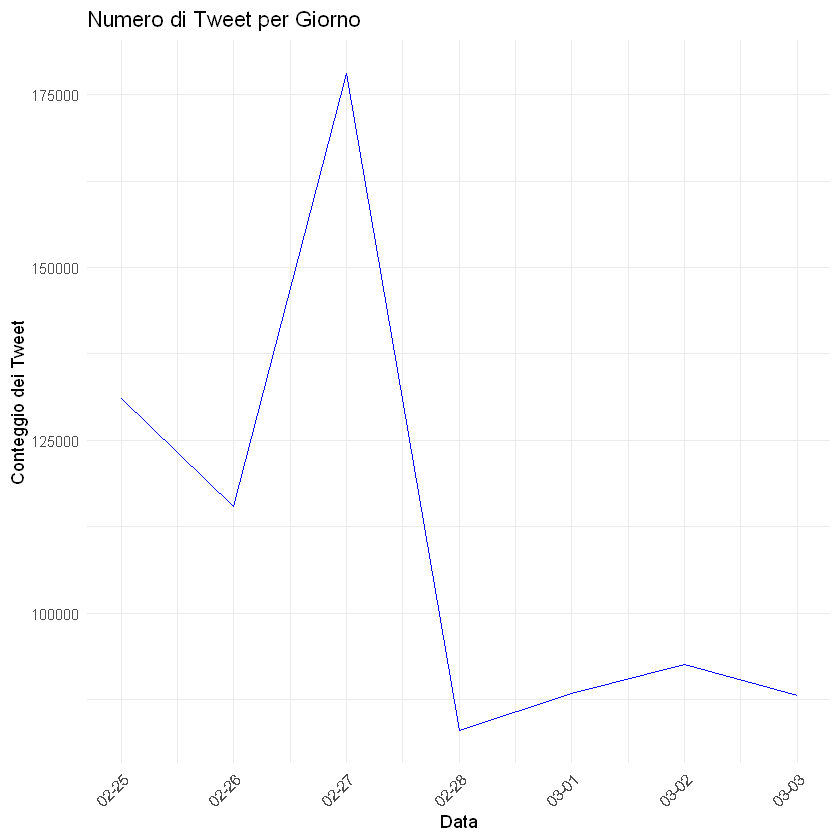

In [6]:
library(dplyr)
library(ggplot2)
library(lubridate)

df_copy <- df

df_copy$tweetcreatedts <- as.Date(df_copy$tweetcreatedts)

# Estrai la data (giorno, mese, anno) senza l'orario
df_copy$tweetcreatedts <- floor_date(df_copy$tweetcreatedts, unit = "day")

# Raggruppa per giorno e conta il numero di tweet per ogni giorno
tweet_per_giorno <- df_copy %>%
  group_by(tweetcreatedts) %>%
  summarise(conteggio = n())

# Visualizza il grafico della serie temporale giornaliera
ggplot(tweet_per_giorno, aes(x = tweetcreatedts, y = conteggio)) +
  geom_line(color = "blue") +  # Usa una linea per rappresentare la serie temporale
  labs(title = "Numero di Tweet per Giorno", x = "Data", y = "Conteggio dei Tweet") +
  theme_minimal() +  # Usa un tema minimale per il grafico
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Ruota le etichette della data
  scale_x_date(
    breaks = "1 day",  
    labels = scales::date_format("%m-%d")  # Formatta le etichette come data
  )

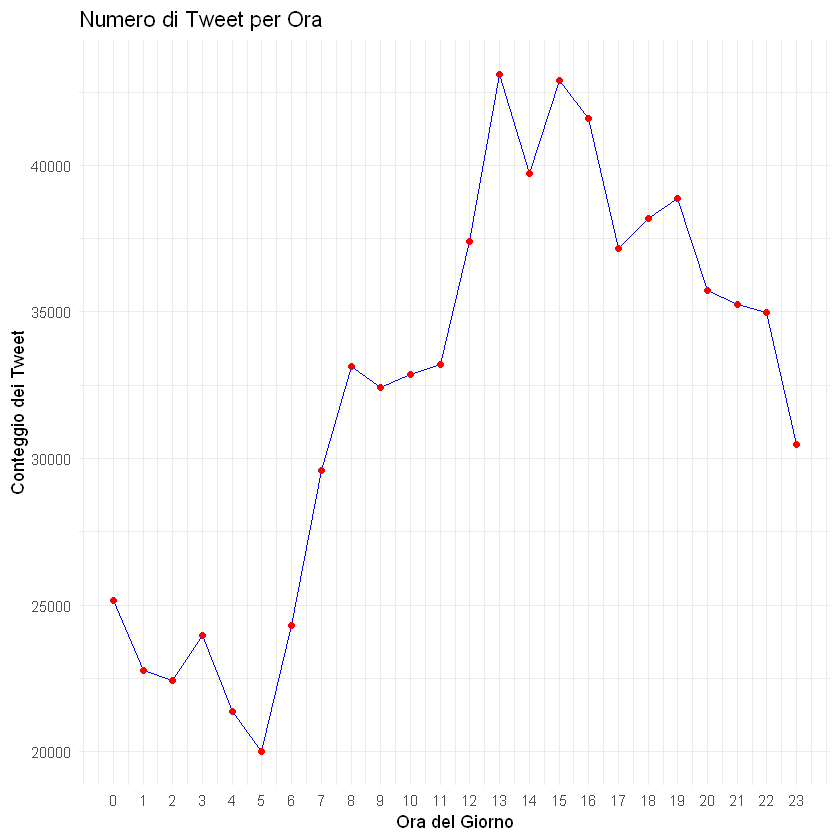

In [9]:
library(dplyr)
library(ggplot2)
library(lubridate)

df_copy <- df

# Converti la colonna 'tweetcreatedts' in formato POSIXct 
df_copy$tweetcreatedts <- as.POSIXct(df_copy$tweetcreatedts, format = "%Y-%m-%d %H:%M:%S")

# Estrai l'ora dalla colonna '
df_copy$ora <- format(df_copy$tweetcreatedts, "%H")

# Raggruppa per ora e conteggio tweet
tweet_per_ora <- df_copy %>%
  group_by(ora) %>%
  summarise(conteggio = n())

ggplot(tweet_per_ora, aes(x = as.numeric(ora), y = conteggio)) +
  geom_line(color = "blue") +  
  geom_point(color = "red") +  
  labs(title = "Numero di Tweet per Ora", x = "Ora del Giorno", y = "Conteggio dei Tweet") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23)  

In [18]:
df_neg %>% count(sentiment)
df_pos %>% count(sentiment)
df_neu %>% count(sentiment)

sentiment,n
<chr>,<int>
neg,467532


sentiment,n
<chr>,<int>
pos,100642


sentiment,n
<chr>,<int>
neu,208415
